# from https://stackabuse.com/retinanet-object-detection-with-pytorch-and-torchvision/

In [1]:
from torchvision.io.image import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from torchvision.models.detection import retinanet_resnet50_fpn_v2, RetinaNet_ResNet50_FPN_V2_Weights
import matplotlib.pyplot as plt
import requests

In [2]:
# response = requests.get('https://i.ytimg.com/vi/q71MCWAEfL8/maxresdefault.jpg')
response = requests.get('https://static01.nyt.com/images/2021/07/07/realestate/07LIVING-FAIRFIELDCT-slide-TGZT/07LIVING-FAIRFIELDCT-slide-TGZT-superJumbo.jpg?quality=75&auto=webp')
open("obj_det.jpeg", "wb").write(response.content)
img = read_image("obj_det.jpeg")

In [3]:
weights = RetinaNet_ResNet50_FPN_V2_Weights.DEFAULT
model = retinanet_resnet50_fpn_v2(weights=weights, score_thresh=0.35)
# Put the model in inference mode
model.eval()
# Get the transforms for the model's weights
preprocess = weights.transforms()

In [4]:
batch = [preprocess(img)]
prediction = model(batch)[0]

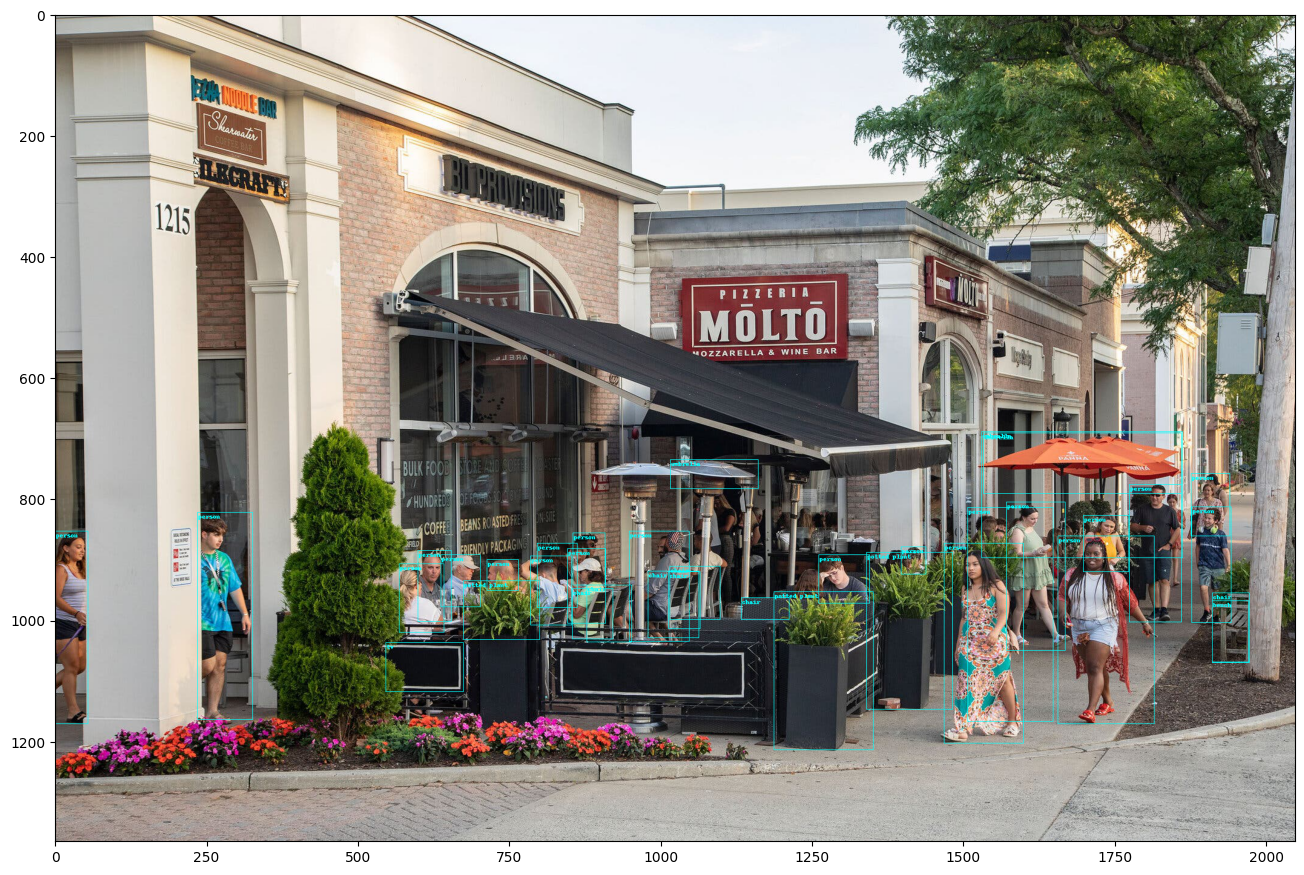

In [5]:
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="cyan",
                          width=1)

im = to_pil_image(box.detach())
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(im)
plt.show()